Name: __________________        Class: __________________     Date: __________________

<center>
    <img width="100%" src="https://raw.githubusercontent.com/astroDimitrios/AstronomyClass/master/DesignAssets/Ai/Banner3plainCut.png" alt='AP Logo'>
</center>

# Stellar Fusion

### AIM - Explain why we use different units when dealing with particles, describe binding energy, explain the process of fusion with calculations.
Difficulty: Medium

**Predict**

Have a think about these questions and make some predictions! Be sure to tell someone else what you predict.

1) How much energy does it take to bind two protons together?  
2) Does fusing all atoms release energy?  
3) How hot does the Sun have to be for fusion to occur?

**Enter your predictions:**    
1)    
2)    
3)    

## Contents

* [Start](#Start)
* [Units and Particles](#UandP)
* [Mass Excess, Mass Defect, and Binding Energy](#MEDB)
* [Visualising Binding Energy](#VBE)
* [Stellar Fusion](#Fusion)
* [Coulomb Barrier](#CB)
* [Challenges](#Challenges)
* [References](#References)

## Let's go: <a class="anchor" id="Start"></a>

Import the required modules below:

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import Image
%matplotlib inline

## Units and Particles <a class="anchor" id="UandP"></a>

Before we look at fusion we need to know about some elementary particles.  
An atom is made up of protons and neutrons in a central nucleus, and electrons which orbit the nucleus.  
These three particles are very small! The mass of a proton is defined below:

In [2]:
pMass = 1.6726219236951*10**(-27) # kg

This is a super small number! Lets introduce the atomic mass unit, $u$.  
This lets us convert our proton mass to a larger number which is easier to work with.


In [3]:
atomicMassUnit = 1.66054*10**(-27) # kg
pMassInAMU = pMass/atomicMassUnit

print(f"Proton's mass in atomic mass units: {pMassInAMU} u")

Proton's mass in atomic mass units: 1.00727590042703 u


This number is a lot easier to work with!

Particles also have a rest energy associated with their mass by Einstein's famous equation $E = mc^2$.


In [4]:
c = 299792458 # m/s
# Use Einstein's equation to calculate the rest energy of a Proton
# Your code here:
pEnergy = pMass*c**2

print(f"Proton's rest energy: {pEnergy} J")

Proton's rest energy: 1.5032776159897095e-10 J


Hold on we used the mass in $kg$ here but we converted the mass into $u$ earlier to make the numbers easier to handle.  
Let's see if we can change the energy into more workable units as well.

We will convert Joules into electron volts ($eV$).  

$$1 eV = 1.602176634\times10^{-19} J$$   

($1.602176634\times10^{-19}$ is also the charge of an electron in Coulombs!)


In [5]:
eV = 1.602176634*10**(-19) # J
# Convert this rest energy to eV
# Your code here:
pEnergyeV = pEnergy/eV

print(f"Proton's rest energy: {pEnergyeV/1000000} MeV")

Proton's rest energy: 938.2720881633513 MeV


You'll notice we also divided by a million to print the answer in $MeV$.

Actually we can skip a few steps if we define the proton's mass in $u$ from the beginning:


In [6]:
pM = 1.00727646662153 # proton mass in u

print(f"{round(pM,5)==round(pMassInAMU,5)} - Yay! The accepted value is close to our calculated mass.")

True - Yay! The accepted value is close to our calculated mass.


We can then use the atomic mass unit energy equivalence to convert $u$ to $MeV$.

$$u = 931.4941024228 MeV/c^2$$

In [7]:
utoE = 931.4941024228 # MeV/c^2
# Calculate the proton's rest energy again but this time use atomic mass units
# Your code here:
pE = pM*utoE
print(f"Proton's rest energy: {pE} MeV")

print(f"{round(pE,3)==round(pEnergyeV/1000000,3)} - Yay! Our two values are in agreement.")

Proton's rest energy: 938.2720881672315 MeV
True - Yay! Our two values are in agreement.


## Over to you: 

Caculate the mass of a neutron in $u$ and its rest energy in $MeV$.
Are the numbers the same for protons and neutrons? Do the same for an electron.
You will need the mass of a neutron and an electron:

$$m_n = 1.6749274980495\times10^{−27} kg$$
$$m_e = 9.109383701528\times10^{-31} kg$$

In [8]:
# Calculate the mass of a neutron in u and its rest energy in MeV
# Your code below:
nM = 1.6749274980495*10**(-27)/atomicMassUnit  # neutron mass in u
nE = nM*utoE                                   # neutron energy in MeV
eM = 9.109383701528*10**(-31)/atomicMassUnit   # electrom mass in u
eE = eM*utoE                                   # electron energy in MeV

# Mass Excess, Mass Defect, and Binding Energy <a class="anchor" id="MEDB"></a>

Now we know about the different units we are going to use let's start looking at nuclei.
Why nuclei? The temperatures needed to fuse elements are so high that fusion occurs in a plasma where electrons are striped from the atom leaving behind a 'soup' of electrons and nuclei.
It is these nuclei that fuse together.

Lets look at the ${^{1}_{1}H}$ Hydrogen atom and its nucleus. It has an Atomic Number ($Z$) of $1$ and a Mass Number ($A$) of $1$. $Z$ is the number of protons in our nucleus (and the number of electrons in an atom). $A$ is the number of protons and neutrons in the nucleus. Later we'll need the number of neutrons in a nucleus which we can find using $A-Z$.

The mass of the Hydrogen atom is actually greater than the $1\ u$ given by the mass number of Hydrogen. It's ${^{1.0078}_{1}H}$. This extra mass is called the [mass excess](https://en.wikipedia.org/wiki/Mass_excess), it's the actual mass minus the mass number. Let's calculate this mass excess, $\Delta M$.

$$\Delta M = m - A$$

In [9]:
deltaM_H = 1.0078250321-1
print(f"Mass excess for 1H atom: {deltaM_H} u")
print(f"Mass excess for 1H atom: {deltaM_H*utoE*1000} keV")

Mass excess for 1H atom: 0.007825032099999962 u
Mass excess for 1H atom: 7288.971252419063 keV


Notice this is the mass excess for the atom. Getting the excess for the nucleus is more complicated and requires us to subtract the mass of the electron and consider binding energies. This will become clearer later but for those interested:

$$m_{nucleus} = m - Zm_e + B_e$$

The mass of the nucleus, $m_{nucleus}$, is the atomic mass $m$ minus the electron mass $m_e$ plus the electron binding energy $B_e$ ($13.6\ eV$ binding energy for Hydrogen). This assumes all values are in $eV$. After you have this nuclear mass you can consider a mass excess for the nucleus.

$^{12}C$ is defined to have a mass excess of $0$! In fact this is because the definition of the atomic mass unit $u$ is $1/12$ the mass of a $^{12}C$ atom.

Try calculating the mass excess of of an ${^{4.002603}_2 He}$ atom below:

In [10]:
# Your code here:
deltaM_He = 4.002603-4
print(f"Mass excess for 4He atom: {deltaM_He} u")

Mass excess for 4He atom: 0.002602999999999689 u


## Mass Defect

Mass excess was the difference between the actual mass and the mass number. [Mass Defect](https://www.sciencedirect.com/topics/engineering/mass-defect) is the difference between the actual mass, $m_A$, and the sum of the masses of all particles making up the atom (the calculated mass). Stable nuclei have a negative mass defect. You can work out the mass defect $\Delta m$ using:

$$\Delta m = m_A - Z(m_p+m_e) - (A-Z)m_n$$

Try using this equation to calculate the mass defect of ${^{4.002603}_2 He}$:

In [11]:
# you will need the masses of an electron and neutron in amu you calculated earlier
# remember A and Z are integers (you can't have part of a particle!)
# Your code here:
deltaM_defect_He = 4.002603 - 2*(pM+eM) - (4-2)*nM
print(f"Mass defect for 4He atom: {deltaM_defect_He} u")

Mass defect for 4He atom: -0.030375790397543234 u


This value of $-0.03\ u$ is $0.8\%$ the mass of the $2$ protons, $2$ neutrons, and $2$ electrons added together! Again this value is for an atom. To get the defect of just the nucleus we would need a value for $m_{nucleus}$ first.

## Binding Energy

[Nuclear binding energy](https://en.wikipedia.org/wiki/Nuclear_binding_energy) is the energy needed to break a nucleus into protons and neutrons.  
Electron binding energy is the energy needed to break the electrons free from the atom. More correctly the atomic binding energy is the energy to break all the electrons free whereas the electron binding energy is just to break one specific electron free and is also sometimes called the ionisation energy.

Think of it this way:

$${^{1.0078}_{1}H} + electron\ binding\ energy = p$$

$${^{4.0026}_{2}He^{2+}} + nuclear\ binding\ energy = 2p + 2n$$

Since fusion deals with nuclei we will only consider nuclear binding energy which is commonly expressed as binding energy per nucleon in keV or MeV (nucleon being a proton or neutron). The binding energy per nucleon for ${^{1.0078}_{1}H}$ is $0$ because there is only one nucleon.

**Note:** 

Electron binding energy's are order of magnitudes lower than nuclear binding energies and the mass of the electron is much smaller than the mass of any nucleus. This means that while I've tried to be careful with our working and state whether we are looking at the atom or just the nucleus; because the electrons and their binding energies are so small we can assume the atomic values for mass excess, defect etc are the same as the values for the nucleus. If we truly wanted the nuclear binding energy we would first need to calculate the mass of the nucleus, $m_{nucleus}$ (see equation way above). Then we use this mass to calculate the mass defect for the nucleus.

You can use the mass defect to calculate the binding energy, just times the mass defect by the energy equivalence of u:

In [12]:
# here we are ignoring the binding energy and mass of the electrons since they are so small!
# remember the final energy should be positive, print your result
# Your code here:
BE_He = abs(deltaM_defect_He*utoE) 
print(f"Binding Energy for 4He nucleus: {BE_He} MeV")

Binding Energy for 4He nucleus: 28.29486961174264 MeV


The binding energy is usually quoted per nucleon so divide the energy by the nucleon number of Helium:

In [13]:
# Your code here:
BE_He_perA = BE_He/4
print(f"Binding Energy per Nucleon for 4He nucleus: {BE_He_perA} MeV")

Binding Energy per Nucleon for 4He nucleus: 7.07371740293566 MeV


If you managed to follow all of that then great! Don't worry if you need to go back and re-visit these concepts or if it gave you a headache - it certainly did for me when I first wrote this activity. What we should really do is defer to the experts and use experimentally calculated values for binding energy which we will look at below!

## Visualising Binding Energy <a class="anchor" id="VBE"></a>

Before we move on let's look at the binding energy per nucleon for all the elements. We can use the library Pandas to analyse data from the Atomic Mass Data Center which is in the csv "mass16Abundant.csv".

In [14]:
import pandas as pd

df = pd.read_csv('mass16Abundant.csv')

This loads the nuclear data for the most abundant isotope for each element.  
We can have a look at the data using the ```df.head()``` command:

In [15]:
print(df.head())

   N-Z  N  Z   A  EL  MASS EXCESS (keV)  MASS EXCESS ERROR (keV)  \
0   -1  0  1   1   H         7288.97061                  0.00009   
1    0  2  2   4  He         2424.91561                  0.00006   
2    1  4  3   7  Li        14907.10529                  0.00423   
3    1  5  4   9  Be        11348.45300                  0.07700   
4    1  6  5  11   B         8667.70700                  0.01200   

   BINDING ENERGY (keV)  BINDING ENERGY ERROR (keV)  ATOMIC MASS (u)  \
0                 0.000                       0.000         1.007825   
1              7073.915                       0.000         4.002603   
2              5606.439                       0.001         7.016003   
3              6462.668                       0.009         9.012183   
4              6927.732                       0.001        11.009305   

   ATOMIC MASS ERROR(u)  
0          9.000000e-11  
1          6.000000e-11  
2          4.540000e-09  
3          8.200000e-08  
4          1.300000e-08  


This printed out the header and the first five rows. You can see data for the elements Hydrogen to Boron.  
Let's plot the binding energy per nucleon ($keV$ per nucleon) against the atomic number ($Z$):

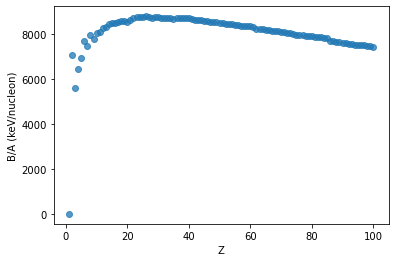

In [16]:
fig = plt.figure(1)
# Add axis labels to this graph!
# Your code here:
plt.xlabel("Z")
plt.ylabel("B/A (keV/nucleon)")

plt.scatter(df["Z"], df["BINDING ENERGY (keV)"], marker='o', alpha=0.75)

Remember we access the data in a column using: 
```python 
df["Name of Column"]
``` 

This isn't very pretty. Let's load an image I made earlier:

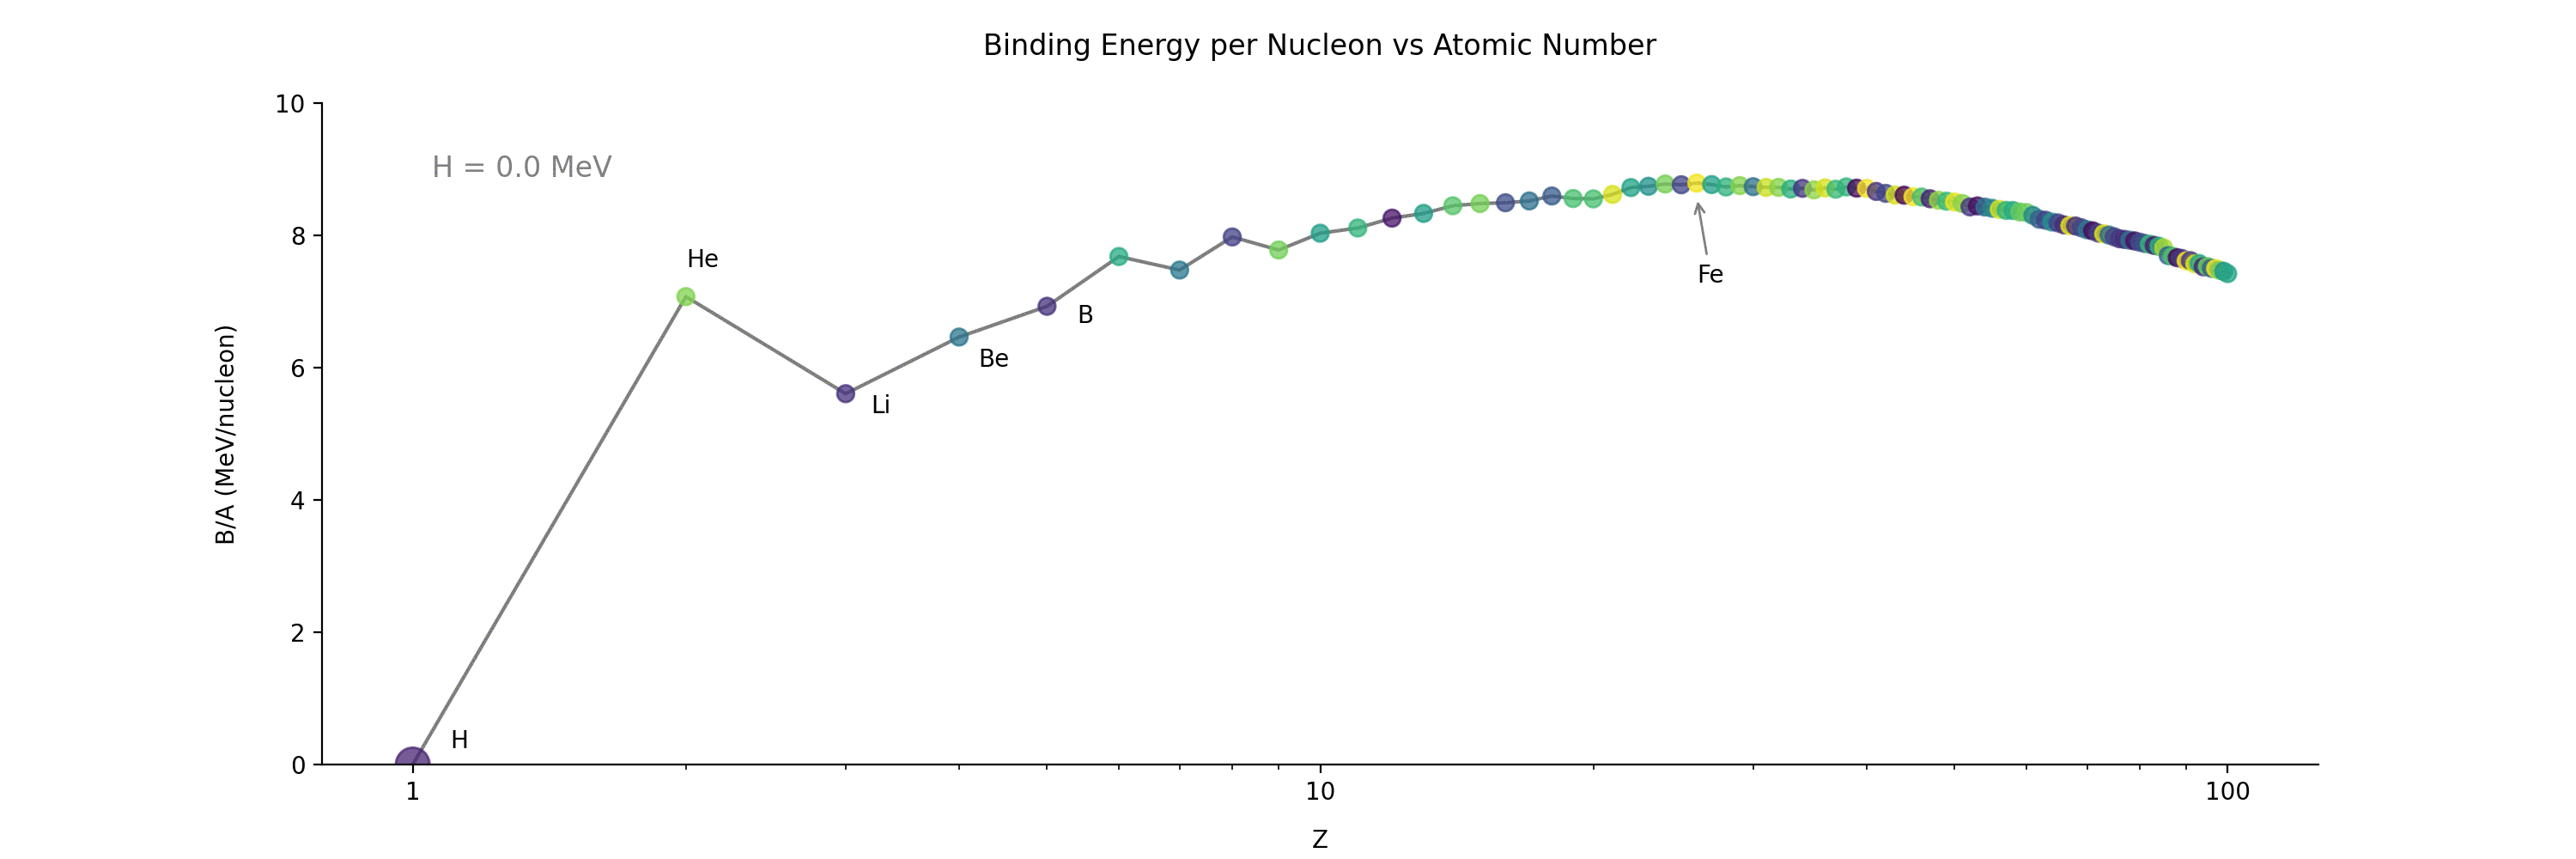

In [17]:
Image("BE Media/bindingEnergyperNLog.gif")

Great! Now we can see the binding energy per nucleon for the most abundant isotopes of each element. We have labelled Iron ($Fe$) because it has the highest binding energy per nucleon (on this graph*). For elements past Iron fusion requires energy instead of releasing it. This means a star can only fuse elements up to Iron (if it's big and hot enough to do so). 

\* $^{62}Ni$ has the highest binding energy per nucleon but is not the most abundant isotope of $Ni$ so isn't shown on this graph. $^{58}Fe$ has the second highest binding energy per nucleon but is much less abundant than the $^{56}Fe$ isotope shown on this graph!

# Stellar Fusion <a class="anchor" id="Fusion"></a>

The main fusion reaction in the sun is the following:

$$4{^{1.0078}_{1}H^{+}}\rightarrow{^{4.0026}_{2}He^{2+}}+2e^{+}+2\nu_{e}$$

Where $H^{+}$ is a hydrogen nucleus (a proton), ${^{4.0026}_{2}He^{2+}}$ is a Helium nucleus, $e^{+}$ is a positron, and $\nu_{e}$ is an electron neutrino.  
There are multiple steps within this overall reaction which we have ignored (see the [p-p chain](https://en.wikipedia.org/wiki/Proton%E2%80%93proton_chain_reaction)).

We can use this equation to calculate a [$Q$ value](https://en.wikipedia.org/wiki/Q_value_(nuclear_science)) for the reaction.  
If energy is released $Q > 0$. If energy is used $Q < 0$.

$$Q/c^2 = 4 \Delta{^{1.0078}_{1}H^{+}}-\Delta{^{4.0026}_{2}He^{2+}}-4m_e$$

This is the initial mass excess minus the final mass excess. Minus the mass of those pesky electrons, $-4\ m_e$ from the $4$ Hydrogen, $-(-2\ m_e)$ from the Helium and $-2\ m_e$ from the positrons giving the final term in the equation $-4\ m_e - (-2\ m_e) - 2\ m_e = -4\ m_e$.
If we use mass excess values in terms of $eV$ we can ignore the $/c^2$ term (which is from Einstein's equation) and our value of $Q$ will be in $eV$.


In [18]:
me = 511 # keV
Q = 4*df["MASS EXCESS (keV)"][0] - df["MASS EXCESS (keV)"][1] - 4*me
Q /= 1000
print(f"Q = {round(Q,3)} MeV")

Q = 24.687 MeV


That's a lot of energy per reaction!
If the two positrons annihilate with two electrons in the plasma (which they most likely will) then an extra $4\ m_e$ of energy is produced.
This brings the $Q$ value to:

In [19]:
# Calculate the new Q value taking into account the 4me
# Your code here:
Q = 4*df["MASS EXCESS (keV)"][0] - df["MASS EXCESS (keV)"][1]
Q /= 1000
print(f"Q = {round(Q,3)} MeV")

Q = 26.731 MeV


This is now simply the initial mass excess minus the final mass excess without worrying about those electrons (remember earlier we said this was valid because the electrons are so small!). The $Q$ value is approximately $0.7\%$ the energy of the original 4 Hydrogen atoms. We can use this fact to estimate how long the sun can shine by fusing Hydrogen only.  
We have to assume that:
 - The sun was initially 100% Hydrogen
 - The sun can only convert the inner 10% to Helium
 
This means only $0.007\times 0.1\times M_\odot$ is converted to energy ($M_\odot$ is the mass of the sun).

In [20]:
mSun = 1.989*10**30                   # kg
Enuclear = 0.007*(0.1*mSun)*c**2      # J
print(f"Total Energy from fusing Hydrogen in the Sun = {Enuclear:.2e} J")
Lsun = 3.828*10**26                   # W (J/s)
# Divide the total energy by the energy radiated per second by the Sun (the luminosity of the sun)
tnuclear = Enuclear/Lsun              # This gives us a time in seconds
print(f"Sun's Hydrogen fusing lifetime = {tnuclear/3600/24/365.25:.1e} years")

Total Energy from fusing Hydrogen in the Sun = 1.25e+44 J
Sun's Hydrogen fusing lifetime = 1.0e+10 years


That's a long time to be shining! Our Sun will spend approximately $10$ billion years on the main sequence by our calculations and since it's $4.6$ billion years old it has another $5.4$ billion years to shine!

Let's finish this activity by looking at the energy needed for two protons to fuse which is the first step when fusing Hydrogen into Helium (as part of the pp chain).

## Coulomb Barrier <a class="anchor" id="CB"></a>

Nucleons attract each other via the strong force.  
Charged particles repel each other via the electrostatic (also called Coulomb) force.

The first stage of fusion in a star is two protons colliding. To fuse they need to overcome their repulsion.
More precisely they need to overcome the [Coulomb Barrier](http://hyperphysics.phy-astr.gsu.edu/hbase/NucEne/coubar.html) by having a certain energy.

This potential energy barrier is approximated by the [electric potential energy](https://en.wikipedia.org/wiki/Electric_potential_energy):

$$V_c(r) = 14.3996\ \frac{Z_1Z_2e^2}{r}$$

at distances greater than

$$r_n \approxeq 1.44\times10^{-15}(A_1^{\frac{1}{3}}+A_2^{\frac{1}{3}})\ m$$

Here $Z_1$ and $Z_2$ are the atomic numbers, $A_1$ and $A_2$ are the mass numbers, and $e$ is the charge of an electron. Using units of $eV$ and Angstrom ($\mathring{A} = 10^{-10}\ m$) we get $V_c(r)$ in $eV$.

The potential energy at the top of the barrier is:

$$V_b \approxeq V_c(r_n) = Z_1Z_2\ /\ (A_1^{\frac{1}{3}}+A_2^{\frac{1}{3}})\ MeV$$

At distances closer than $r_n$ the nuclei fuse and drop into the "nuclear well" which has a negative potential (they release energy).

We can visualise the barrier for two protons like this:

In [21]:
rn = 1.44*(1**(1/3)+1**(1/3)) # fm     since we ignored the 10^-15

# array of distance values, find the index where r=rn
r = np.arange(0,10.01,0.01)   # fm
indrn = np.where(r==rn)[0][0]

# initialise the Vc(r) array
Vc = np.zeros(len(r))

# for r greater than rn calculate the electric potential energy
for i in range(indrn+1,len(r)):
    # use the first equation from electric potential energy to complete the code below
    # here we need to convert r to Angstrom (divide r[i] by 10^5) and then divide by a million to get MeV
    # remember e is 1 in units of eV
    # Your code here:
    Vc[i] = 14.3996 / (r[i]/100000) / 1000000 # MeV
    
# set the barrier potential energy at rn (last equation)
# Your code here:
Vb = 1/(1**(1/3)+1**(1/3))
Vc[indrn] = Vb # MeV

# set the nuclear well potential energy to the binding energy of the product (in this case deuterium)
bEDeuterium = -1112.283/1000 # MeV    taken from the mass16.csv we saw earlier!
# set potentials closer than rn to equal the well energy
for i in range(0,indrn):
    Vc[i] = bEDeuterium

Make sure you read through the comments in the code above so you know what's happening. We have constructed an array of distances and potentials. Now lets plot them:

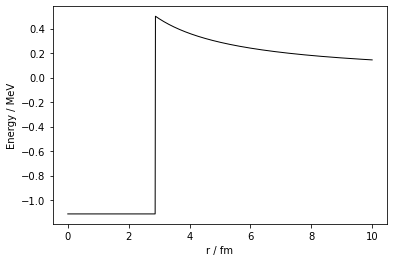

In [22]:
fig2 = plt.figure(2)
plt.xlabel("r / fm")
plt.ylabel("Energy / MeV")
plt.plot(r,Vc,c="k",linewidth=1)

Great! Let's load a version that I made earlier to have a look at:

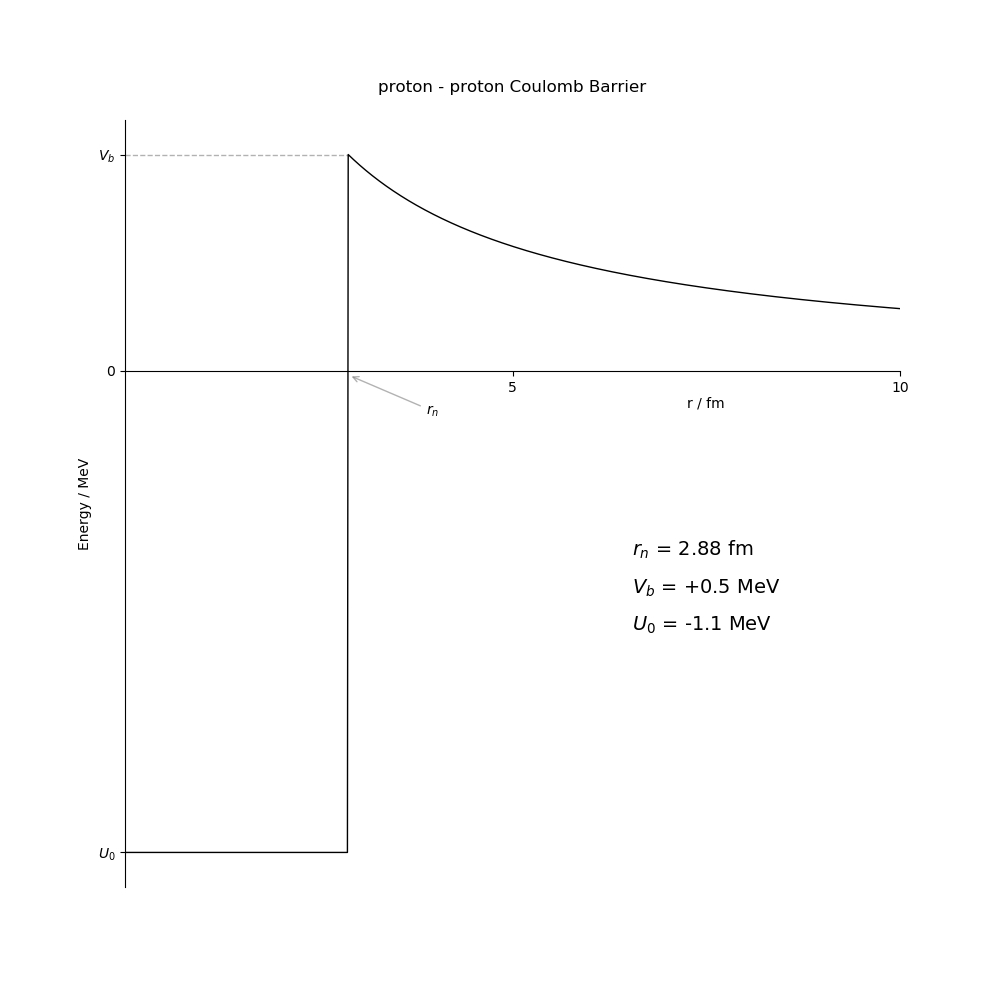

In [23]:
Image("ppCoulombBarrier.png")

You can see the potential energy increases with decreasing $r$ until the barrier energy $V_b$ at $r_n$. Then the nuclei fuse! Since the product of two protons fusing is deuterium the value of the "nuclear well" $U_0$ is the binding energy of deuterium (you can find this in mass16.csv).

In reality quantum tunneling allows the nuclei to 'tunnel' through the peak of the barrier.
This means they don't need as high an energy to fuse.
Since energy is related to temperature, a lower required energy means the required temperature is also lower.  
If it weren't for quantum tunneling the probability of fusion in our sun would be very small!

# Challenge <a class="anchor" id="Challenges"></a>

1) Recreate my Binding Energy Plot (or create the more common B/A vs A plot)  
2) Calculate the energy released for each step of the p-p chain  
3) Create a barrier plot for the next step of the p-p chain  

Write your code below!

In [24]:
# Your code here:


# References and Resources <a class="anchor" id="References"></a>

1) Atzeni, S. and Meyer-ter-Vehn, J. (2004) The Physics of Inertial Fusion, OUP, ISB: 9780198562641, Url: http://www.fisicanucleare.it/documents/0-19-856264-0.pdf  
2) Shatz, H. (2020) The mass of a nucleus, Url: https://people.nscl.msu.edu/~schatz/PHY983_13/Lectures/mass.pdf  
3) Mihos, C. (2020) Stars and Planets, Url: http://burro.astr.cwru.edu/Academics/Astr221/StarPhys/nuclear.html
 
4) Nuclear Data from the Atomic Mass Data Center (AMDC) - https://www.jinaweb.org/science-research/scientific-resources/data  
5) Table of Isotopic Masses and Natural Abundances - http://www.sophphx.caltech.edu/Physics_6/Mathematica%20Notebooks/Mass%20Spectrometer%20Exp%209/element%20data/atomic_mass_abund.pdf


**Notes:**

For reference 1:
* link is dead :( - pdf is included in this directory

For reference 5:
* link is dead :( - pdf is included in this directory
* the data is from G. Audi, A. H. Wapstra Nucl. Phys A. 1993, 565, 1-65 and G. Audi, A. H. Wapstra Nucl. Phys A. 1995,595, 409-480.   
* the percent natural abundance data is from the 1997 report of the IUPAC Subcommittee for IsotopicAbundance Measurements by K.J.R. Rosman, P.D.P. Taylor Pure Appl. Chem.1999, 71, 1593-1607.

## Sharing

If you share, use or modify this activity in any way use the citation in this [txt file](https://github.com/astroDimitrios/Astronomy/blob/master/CITATION.txt).    
Please contact me at astrodimitrios@gmail.com with any suggestions, mistakes found, or general questions about teaching astronomy with Python.

© Dimitrios Theodorakis GNU General Public License v3.0 

https://github.com/astroDimitrios/Astronomy  